In [10]:
# Install Qiskit and the Aer simulator separately
!pip install qiskit
!pip install qiskit-aer
!pip install pylatexenc
!pip install qiskit[visualization]

In [11]:
# Import required libraries
from qiskit import QuantumCircuit
from qiskit_aer import Aer  # Aer backend for simulation
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import matplotlib.pyplot as plt
import numpy as np

# Check available Aer backends
print("Available Aer backends:", Aer.backends())

Available Aer backends: [AerSimulator('aer_simulator'), AerSimulator('aer_simulator_statevector'), AerSimulator('aer_simulator_density_matrix'), AerSimulator('aer_simulator_stabilizer'), AerSimulator('aer_simulator_matrix_product_state'), AerSimulator('aer_simulator_extended_stabilizer'), AerSimulator('aer_simulator_unitary'), AerSimulator('aer_simulator_superop'), QasmSimulator('qasm_simulator'), StatevectorSimulator('statevector_simulator'), UnitarySimulator('unitary_simulator')]


=== Exercise 1: Pauli Operators ===
State after X gate: Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


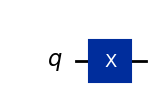

State after Y gate: Statevector([0.+0.j, 0.+1.j],
            dims=(2,))


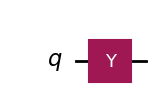

State after Z gate: Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


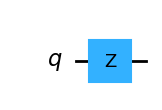

In [12]:
print("=== Exercise 1: Pauli Operators ===")

# X gate
qc_x = QuantumCircuit(1)
qc_x.x(0)
sv_x = Statevector.from_instruction(qc_x)
print("State after X gate:", sv_x)
display(qc_x.draw('mpl'))

# Y gate
qc_y = QuantumCircuit(1)
qc_y.y(0)
sv_y = Statevector.from_instruction(qc_y)
print("State after Y gate:", sv_y)
display(qc_y.draw('mpl'))

# Z gate
qc_z = QuantumCircuit(1)
qc_z.z(0)
sv_z = Statevector.from_instruction(qc_z)
print("State after Z gate:", sv_z)
display(qc_z.draw('mpl'))

In [13]:
print("=== Exercise 2: Basic Quantum Gates ===")

# Create a 2-qubit circuit
qc_bg = QuantumCircuit(2)

# Apply gates
qc_bg.h(0)      # Hadamard gate on qubit 0
qc_bg.cx(0, 1)  # CNOT gate (control 0, target 1)
qc_bg.s(0)      # S gate on qubit 0
qc_bg.t(1)      # T gate on qubit 1

# Get the statevector
from qiskit.quantum_info import Statevector
sv_bg = Statevector.from_instruction(qc_bg)
print("Statevector after basic gates:", sv_bg)

# Draw the circuit in text mode
print(qc_bg.draw('text'))

=== Exercise 2: Basic Quantum Gates ===
Statevector after basic gates: Statevector([ 0.70710678+0.j ,  0.        +0.j ,  0.        +0.j ,
             -0.5       +0.5j],
            dims=(2, 2))
     ┌───┐     ┌───┐
q_0: ┤ H ├──■──┤ S ├
     └───┘┌─┴─┐├───┤
q_1: ─────┤ X ├┤ T ├
          └───┘└───┘


In [14]:
print("=== Exercise 3: Measurement ===")

# Create a 2-qubit circuit
qc_meas = QuantumCircuit(2)

# Apply gates
qc_meas.h(0)
qc_meas.cx(0, 1)

# Measure all qubits
qc_meas.measure_all()

# Use Aer simulator and run the circuit
from qiskit_aer import Aer
sim = Aer.get_backend('qasm_simulator')
job = sim.run(qc_meas, shots=1024)
result = job.result()
counts = result.get_counts()

# Show measurement results
print("Measurement counts:", counts)

# Plot histogram
from qiskit.visualization import plot_histogram
plot_histogram(counts)
plt.show()

# Draw circuit in text mode
print(qc_meas.draw('text'))

=== Exercise 3: Measurement ===
Measurement counts: {'00': 507, '11': 517}
        ┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1 


In [15]:
print("=== Exercise 4: Bloch Sphere ===")

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt
import numpy as np

# Create 1-qubit circuit
qc_bloch = QuantumCircuit(1)

# Apply rotations
qc_bloch.rx(np.pi/2, 0)  # Rotate around X-axis
qc_bloch.ry(np.pi/2, 0)  # Rotate around Y-axis
qc_bloch.rz(np.pi/2, 0)  # Rotate around Z-axis

# Get statevector after rotations
sv_bloch = Statevector.from_instruction(qc_bloch)
print("Statevector after rotations:", sv_bloch)

# Plot Bloch sphere
plot_bloch_multivector(sv_bloch)
plt.show()

# Draw the circuit in text mode
print(qc_bloch.draw('text'))

=== Exercise 4: Bloch Sphere ===
Statevector after rotations: Statevector([0.70710678-5.55111512e-17j, 0.70710678-5.55111512e-17j],
            dims=(2,))
   ┌─────────┐┌─────────┐┌─────────┐
q: ┤ Rx(π/2) ├┤ Ry(π/2) ├┤ Rz(π/2) ├
   └─────────┘└─────────┘└─────────┘


In [16]:
print("=== Exercise 5: Combined Circuit ===")

from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Create a 2-qubit circuit
qc_comb = QuantumCircuit(2)

# Apply gates
qc_comb.h(0)
qc_comb.cx(0, 1)
qc_comb.z(1)
qc_comb.s(0)
qc_comb.t(1)

# Measure all qubits
qc_comb.measure_all()

# Run on Aer simulator
sim = Aer.get_backend('qasm_simulator')
job_comb = sim.run(qc_comb, shots=1024)
result_comb = job_comb.result()
counts_comb = result_comb.get_counts()

# Show measurement results
print("Measurement counts for combined circuit:", counts_comb)

# Plot histogram
plot_histogram(counts_comb)
plt.show()

# Draw circuit in text mode
print(qc_comb.draw('text'))

=== Exercise 5: Combined Circuit ===
Measurement counts for combined circuit: {'00': 527, '11': 497}
        ┌───┐     ┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■──┤ S ├──────░─┤M├───
        └───┘┌─┴─┐├───┤┌───┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├┤ Z ├┤ T ├─░──╫─┤M├
             └───┘└───┘└───┘ ░  ║ └╥┘
meas: 2/════════════════════════╩══╩═
                                0  1 
